In [27]:
%load_ext autoreload

%autoreload 2
import sys
import corner
import numpy as np
import matplotlib.pyplot as plt
import scipy
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import covariance as covar
import utils
import pandas as pd
import abundance as cl_count
import forecast
import emcee
from lnlikelihood import lnLikelihood
import pyccl as ccl
import edit
import h5py, glob
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]

sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/')
import analysis

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
%load_ext autoreload
%autoreload 2
import getdist
from getdist import plots, MCSamples

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [134]:
err_noSSC = []
fit_noSSC = []
fit_SSC = []
samples_noSSC = []
err_SSC = []
samples_SSC = []
names = ['1', '2',]
labels =  [r'\Omega_m', r'\sigma_8']
settings={'mult_bias_correction_order':0,'smooth_scale_2D':8, 'smooth_scale_1D':6, 'boundary_correction_order':0}
zbin = [[0.1, 0.2], [0.2, 0.3], [0.3, 0.4]
                ,[0.4, 0.5], [0.5, 0.6], [0.6, 0.7]
                ,[0.7, 0.8], [0.8, 0.9], [0.9, 1.], [0.1, 1]]
z_ = []
for i in range(9):
    z1, z2 = zbin[i]
    z_.append(np.mean([z1, z2]))
    #try:
    #z1 = analysis.analysis['partial_z']['redshift_bins'][i][0]
        #z2 = analysis.analysis['partial_z']['redshift_bins'][i][1]
    samplei = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/chains/mcmc_chains_unbinned_noSSC_zbin_{i}.npy')
    err_noSSC.append(np.std(samplei[8000:],axis=0))
    fit_noSSC.append(np.mean(samplei[8000:],axis=0))
    samples_noSSC.append(MCSamples(samples=samplei[5000:],names = names, 
                    labels = labels, 
                     settings=settings, 
                     label=f'${z1}< z <{z2}$'))
    samplei = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/chains/mcmc_chains_unbinned_SSC_{i}.npy')
    err_SSC.append(np.std(samplei[8000:], axis=0))
    fit_SSC.append(np.mean(samplei[8000:],axis=0))
    samples_SSC.append(MCSamples(samples=samplei[5000:],names = names, 
                    labels = labels, 
                     settings=settings,)) 
                         #label=f'${analysis.redshift_bins[i][0]}< z <{analysis.redshift_bins[i][1]}$'))
    #except: a=1


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


In [135]:
samplei = np.load(f'/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/notebooks/Unbinned_likelihood_with_SSC/chains/mcmc_chains_unbinned_noSSC_full_0.npy')
s = MCSamples(samples=samplei[5000:],names = names, 
                        labels = labels, 
                         settings=settings, 
                         label=f'full')
samples_noSSC.append(s)

Removed no burn in


In [136]:
import matplotlib.pylab as pl
colors = plt.cm.get_cmap('cividis', len(samples_noSSC)-1)
c = [colors(i) for i in range(len(samples_noSSC)-1)]

In [137]:
range_ = {'1':[.25, .39], '2':[.8, .9]}

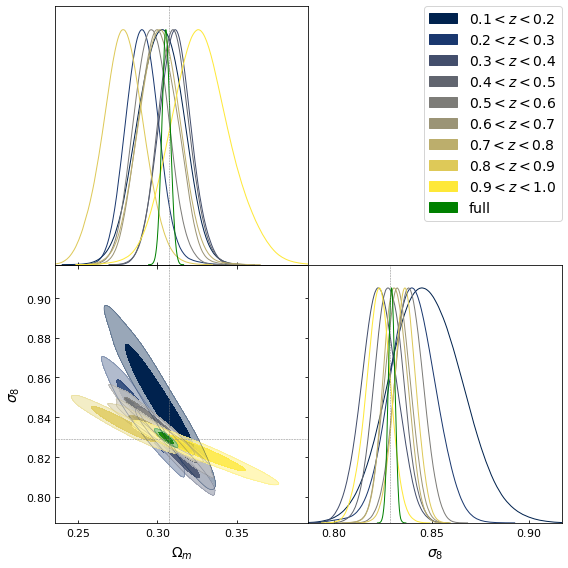

In [138]:
g = plots.get_subplot_plotter(subplot_size=4)
g.settings.legend_fontsize = 14
#plt.style.use('dark_background')
g.triangle_plot(samples_noSSC ,
                #samples_SSC,
                filled=True,
                #[False for i in range(len(samples_noSSC)-3)] + [True],
                contour_colors = c + ['g'] + c + ['g'], 
                contour_ls=['-' for i in range(len(samples_noSSC))]+['--' for i in range(len(samples_noSSC))],
                contour_lws=1,
                #param_limits = range_,
                       fine_bins = 1,  marker_args = {'linewidth':2}, markers={'1':0.30711, '2':.8288})
#g.triangle_plot(samples_SSC, filled=False, contour_colors = c + ['g'], contour_ls='--',
#                contour_lws=1,
#                       fine_bins = 1,  marker_args = {'linewidth':2}, markers={'1':0.30711, '2':.8288})
plt.savefig('unbinned_SSC_partialz.png', dpi = 300)

In [139]:
import pandas as pd
where_cat = '/sps/lsst/users/cpayerne/1000xsimulations/1000_simulations/afumagalli/catalogs/plc_14/*'
cat = glob.glob(where_cat)
for i ,cs in enumerate(cat):
    cat_test = pd.read_csv(cs ,sep=' ',skiprows=12, names=['M','z','dec','ra'])
    ra, dec, redshift, Mvir = cat_test['ra'], cat_test['dec'], cat_test['z'], cat_test['M']/0.6777
    if i == 3: break

In [144]:
n = []
for i in range(9):
    i = i+1
    logmmin = 14.2
    logmmax =15.6
    zmin = zbin[i][0]
    zmax = zbin[i][1]
    print
    mask = (redshift > zmin)&(redshift < zmax)
    mask = mask &(np.log10(Mvir) > logmmin)&(np.log10(Mvir) < logmmax)
    redshift_cut = redshift[mask]
    Mvir_cut = Mvir[mask]
    print(len(Mvir_cut))
    n.append(len(Mvir_cut))

6615
9911
12180
12954
12427
11303
9694
8260
86817


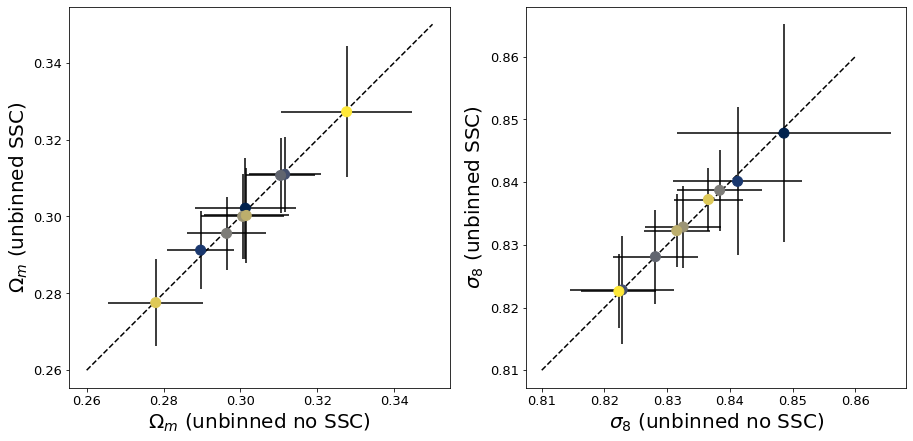

In [151]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].errorbar(np.array(fit_noSSC)[:,0], np.array(fit_SSC)[:,0], yerr=np.array(err_SSC)[:,0], xerr = np.array(err_noSSC)[:,0],  label ='\Omega_m', fmt = ' ', marker = 'o', color = 'k')
ax[0].scatter(np.array(fit_noSSC)[:,0], np.array(fit_SSC)[:,0], marker = 'o', c = c, s=100, zorder=100)
x = np.linspace(0.26, 0.35, 10)
ax[0].plot(x,x,'--k')
ax[0].set_xlabel(r'$\Omega_m$ (unbinned no SSC)', fontsize=20)
ax[0].set_ylabel(r'$\Omega_m$ (unbinned SSC)', fontsize=20)
ax[1].errorbar(np.array(fit_noSSC)[:,1], np.array(fit_SSC)[:,1], yerr=np.array(err_SSC)[:,1], xerr = np.array(err_noSSC)[:,1],  label ='\Omega_m', fmt = ' ', marker = 'o', color = 'k')
ax[1].scatter(np.array(fit_noSSC)[:,1], np.array(fit_SSC)[:,1], marker = 'o', c = c, s=100, zorder=100)
x = np.linspace(0.81, 0.86, 10)
ax[1].plot(x,x,'--k')
ax[1].set_xlabel(r'$\sigma_8$ (unbinned no SSC)', fontsize=20)
ax[1].set_ylabel(r'$\sigma_8$ (unbinned SSC)', fontsize=20)
ax[0].axis('equal')
ax[1].axis('equal')
ax[1].tick_params(axis='both', which = 'major', labelsize= 13)
ax[0].tick_params(axis='both', which = 'major', labelsize= 13)
plt.savefig('res_partialz.png', bbox_inches='tight', dpi=300)